Two-body approximation

In [343]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [344]:
R_earth = 6371302 # in m
mu_earth = 398600.4415e+9
omega_earth = 7.29211e-5

широта (lat) - угол между r и xOy и по  z  определяем знак
долгота (long) - угол между r и xOz  по z определяем 360-fi

In [345]:
def angle_between(v1,v2):
    return np.arccos(np.clip(np.dot(v1 / np.linalg.norm(v1), v2 / np.linalg.norm(v2)), -1.0, 1.0))

def getProjection(y):
    #print(y)
    lat = (np.pi / 2 - angle_between(y[:3], np.array([0,0,1])))
    long = angle_between(y[:2], np.array([1,0]))*(np.sign(y[1]) if y[1]!=0 else 1)
    return np.append(lat,long)

In [346]:
angle_between(np.array([0,0,1]), np.array([0,1,0]))*180/np.pi

np.float64(90.0)

In [347]:
# [x y z vx vy vz] -> [lat, long]

print(getProjection(np.array([0,1,0,0,0,0]))*180/np.pi)
print(getProjection(np.array([0,0,1,0,0,0]))*180/np.pi)
print(getProjection(np.array([0,1,1,0,0,0]))*180/np.pi)
print(getProjection(np.array([1,1,0,0,0,0]))*180/np.pi)
print(getProjection(np.array([-0.4,0,0,0,0,0]))*180/np.pi)


[ 0. 90.]
[90. nan]
[45. 90.]
[ 0. 45.]
[  0. 180.]


/var/folders/k_/clwcs1zs1wxbpjn827kqbqc40000gn/T/ipykernel_23925/1109198627.py:2: RuntimeWarning: invalid value encountered in divide
  return np.arccos(np.clip(np.dot(v1 / np.linalg.norm(v1), v2 / np.linalg.norm(v2)), -1.0, 1.0))


In [348]:
# y is considered horizontal matrix
def dydt(t,y_curr: np.array, p):
    # gravity center is at (0,0,0)
    # a = mu / r**2
    grav_pos = np.array([0,0,0])
    
    r = y_curr[:3]
    a = -p['mu'] / np.sqrt(np.sum(r**2)) ** 3 * r
    #print(y_curr[:3], a)
    return np.append(y_curr[3:], a)

In [367]:
def ev(t, y):
    return y[2]

ev.tremial=0
ev.direction=0

In [387]:
R_orb=500e3+R_earth
y_0 = np.array([R_orb, 0, 0, 0, (mu_earth / R_orb)**0.5, 0])

T= 120*3600#R_orb * 2 * np.pi *16/ ((mu_earth / R_orb)**0.5)

p={'mu': mu_earth, 'i': 98 / 180 * np.pi}

Rot_x = np.array([[1,0,0],
                      [0, np.cos(p['i']), -np.sin(p['i'])],
                      [0, np.sin(p['i']), np.cos(p['i'])]])

y_rot = np.append(y_0[:3], np.transpose(Rot_x @ np.transpose(y_0[3:])))
sol=solve_ivp(lambda t,y: dydt(t,y,p), [0,T],y_rot, method="RK45",t_eval=np.arange(0,T,60), events=ev, rtol=1e-6)
T/3600

120.0

In [388]:
sol

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [     0     60 ... 431880 431940]
        y: [[ 6.871e+06  6.856e+06 ...  2.208e+06  1.771e+06]
            [ 0.000e+00 -6.355e+04 ... -9.054e+05 -9.239e+05]
            ...
            [-1.060e+03 -1.058e+03 ... -3.407e+02 -2.732e+02]
            [ 7.542e+03  7.526e+03 ...  2.424e+03  1.944e+03]]
      sol: None
 t_events: [array([ 0.000e+00,  2.834e+03, ...,  4.279e+05,  4.308e+05])]
 y_events: [array([[ 6.871e+06,  0.000e+00, ..., -1.060e+03,  7.542e+03],
                  [-6.871e+06,  2.328e-10, ...,  1.060e+03, -7.542e+03],
                  ...,
                  [-6.870e+06,  1.277e-08, ...,  1.060e+03, -7.543e+03],
                  [ 6.870e+06, -3.011e-08, ..., -1.060e+03,  7.543e+03]])]
     nfev: 15086
     njev: 0
      nlu: 0

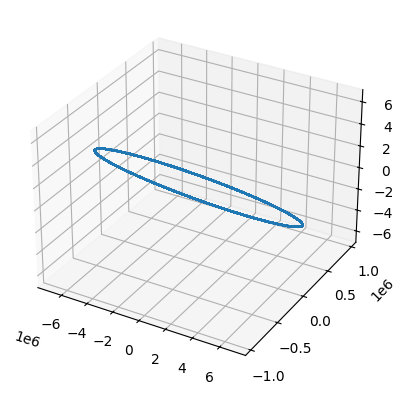

In [389]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot(sol.y[0],sol.y[1],sol.y[2])

In [390]:
np.transpose(sol.y)

array([[ 6.87130200e+06,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -1.05999709e+03,  7.54227121e+03],
       [ 6.85611148e+06, -6.35529601e+04,  4.52202808e+05,
        -5.06163758e+02, -1.05765373e+03,  7.52559733e+03],
       [ 6.81060713e+06, -1.26824909e+05,  9.02406114e+05,
        -1.01008905e+03, -1.05063404e+03,  7.47564963e+03],
       ...,
       [ 2.63543989e+06, -8.83013971e+05,  6.28297088e+06,
        -7.03425855e+03, -4.06639174e+02,  2.89338807e+03],
       [ 2.20786812e+06, -9.05441334e+05,  6.44254985e+06,
        -7.21292208e+03, -3.40665689e+02,  2.42396233e+03],
       [ 1.77052972e+06, -9.23863650e+05,  6.57363144e+06,
        -7.35967928e+03, -2.73185827e+02,  1.94381816e+03]])

In [391]:
dal=200e3/R_earth
sol.y_events[0]

array([[ 6.87130200e+06,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -1.05999709e+03,  7.54227121e+03],
       [-6.87126517e+06,  2.32830644e-10, -3.25962901e-09,
         2.13605950e-03,  1.06000220e+03, -7.54230756e+03],
       [ 6.87129055e+06,  5.52972779e-10, -6.98491931e-10,
         1.56564517e-04, -1.05999784e+03,  7.54227653e+03],
       [-6.87125031e+06,  3.20142135e-10, -4.19095159e-09,
         2.40510973e-03,  1.06000354e+03, -7.54231712e+03],
       [ 6.87127721e+06,  2.95244718e-10,  1.31967681e-09,
         1.88783151e-03, -1.05999888e+03,  7.54228394e+03],
       [-6.87123704e+06, -2.81943358e-10, -7.27595761e-10,
         1.99886124e-03,  1.06000455e+03, -7.54232429e+03],
       [ 6.87126396e+06, -2.18278728e-11,  1.13504939e-09,
         1.38183235e-03, -1.05999987e+03,  7.54229095e+03],
       [-6.87122382e+06, -1.69529812e-09,  1.04773790e-08,
         2.85772585e-03,  1.06000553e+03, -7.54233124e+03],
       [ 6.87125198e+06,  7.85803422e-10, -5.122

np.float64(355.37758866665234)

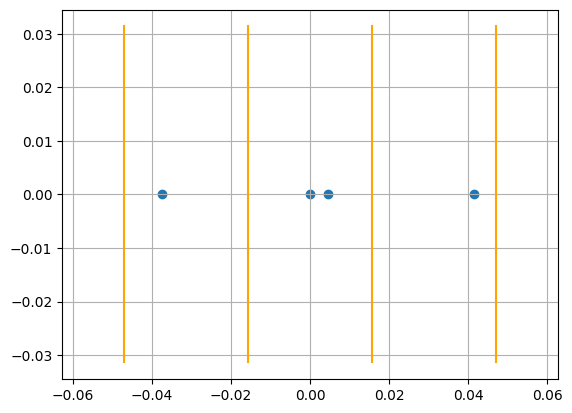

In [392]:
crd=np.array(list(map(getProjection,(sol.y_events)[0]))).transpose()
crd[1]-=sol.t_events[0]*omega_earth
for i in range(crd[1].shape[0]):
    while (crd[1][i]<-np.pi):
        crd[1][i]+=2*np.pi
wh=np.where(np.abs(crd[0])<dal)[0]
plt.scatter(crd[1][wh],crd[0][wh])
plt.plot([-dal/2,-dal/2],[-dal,dal], c='orange')
plt.plot([dal/2,dal/2],[-dal,dal], c='orange')
plt.plot([-3*dal/2,-3*dal/2],[-dal,dal], c='orange')
plt.plot([3*dal/2,3*dal/2],[-dal,dal], c='orange')
plt.xlim(-2*dal, 2*dal)
plt.grid()
np.max(crd[1])*360/np.pi


In [393]:
scrd=np.array(sorted(crd[1]))
print(dal)
print(np.min(scrd[1:]-scrd[:-1]))
print(np.max(scrd[1:]-scrd[:-1]))

0.031390758121338465
0.0045591082907350255
0.04208943035277102


In [394]:
print(crd[1][crd.shape[1]-1])

0.0045591082907350255


Каждый виток долгота меняется на ~ -0.4123 рад

In [395]:
0.37 * R_earth

2357381.7399999998

In [396]:
y_kep = keplerian_based(sol.y, np.pi / 2)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot(y_kep[0], y_kep[1], y_kep[2])

(6, 7200)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 6 is different from 3)